# beamprofile example code

the following snippets provide an example for the usage of the beamprofile module

##  read in data and simple overview plot

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np

import udkm.beamprofile.functions as beam
import udkm.tools.functions as tools

plt.style.use("../../../udkm/tools/udkm_base.mplstyle")

example_data_path='../../../udkm/beamprofile/example/'
os.chdir(example_data_path)

parameter_file_name = "parameters/parameters_example_1.txt"
line = 0

params = beam.get_scan_parameter(parameter_file_name, line)
params["suffix"] = "_image"
params["plot_logarithmic"] = False
params["data_directory"] = "data\\"

params["x_min"] = 1000
params["x_max"] = 3000

params["y_min"] = 3000
params["y_max"] = 5000

scan = beam.load_data(params)
plt.show()


reload scan from: scan_export\20210428_145659.pickle


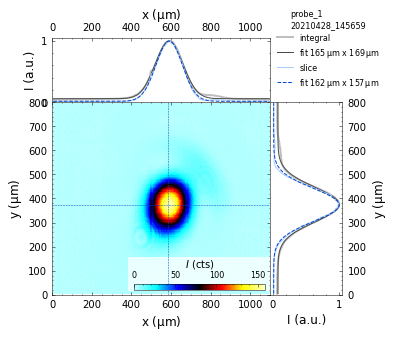

In [2]:
beam.plot_overview(scan)
plt.show()

## Calculation of the corresponding incident fluence

F = 158.4 mJ/cm^2 for 50 mW at an AOI of 0°


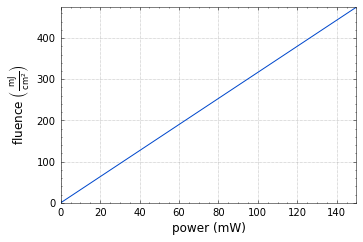

In [3]:
angle = 0
rep_rate = 1000
max_power = 150
set_power = 50

set_fluence = tools.calc_fluence(set_power, scan["fwhm_x"], scan["fwhm_y"], angle, rep_rate)
print("F = " + str(np.round(set_fluence, 1)) + r" mJ/cm^2 for " +
      str(set_power) + " mW at an AOI of " + str(angle) + "°")


power = np.arange(0, max_power+1, 1)
fluence = np.zeros(len(power))
for i, p in enumerate(power):
    fluence[i] = tools.calc_fluence(p, scan["fwhm_x"], scan["fwhm_y"], angle, rep_rate)


# %%
plt.figure()
plt.plot(power, fluence)
plt.xlabel("power (mW)")
plt.ylabel(r"fluence $\left( \mathrm{\frac{mJ}{\,cm^2}} \right)$")
plt.xlim([0, np.max(power)])
plt.ylim([0, np.max(fluence)])
plt.grid("on")
plt.show()
